<a href="https://www.kaggle.com/code/nishantjswl/corn-disease-detection?scriptVersionId=163743297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Used a pre trained model resnet50 for this disease detection

I just started doing this course from fastai , i dont know much about machine learning and deep learning so please dont judge me , give me tips and feedbacks on what i did wrong and what i should do instead.

In [3]:
iskaggle = os.environ.get('KAGGLE_KERNAL_RUN_TYPE','')
if iskaggle:
    !pip install -q fastai
    !pip install -q duckduckgo_search


In [5]:
!pip install -q fastbook

In [6]:
from fastbook import *
from fastdownload import download_url
from fastai.vision.all import * 

got the urls of the images from the duckduckgo for downloading the image for examples later on

In [26]:
def search_images(search_term):
    print(f"Searching for {search_term} ")
    return L(search_images_ddg(search_term , max_images = 20))  

Searching for healthy corn leaf  


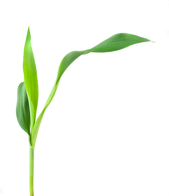

In [24]:
dest = 'example2.jpg'
url = search_images('healthy corn leaf ')
download_url(url[0],dest,show_progress = True)
im = Image.open(dest)
im.to_thumb(196,196)

/opt/conda/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


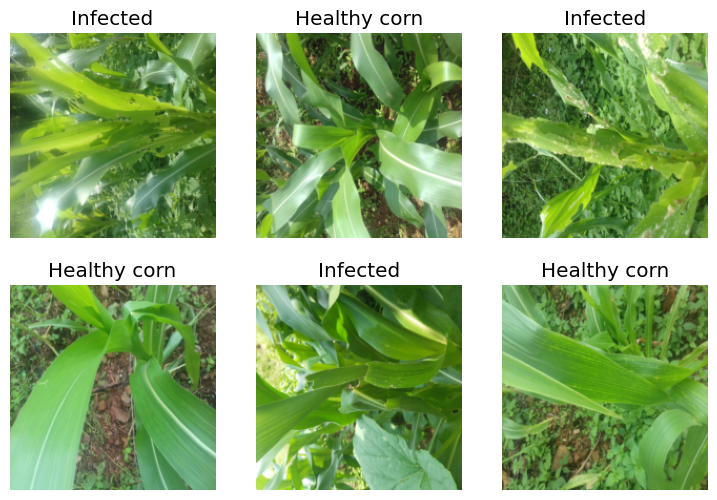

In [18]:
path = Path('/kaggle/input/corn-leaf-infection-dataset/Corn Disease detection')
db = DataBlock(
blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2 , seed =42),
    get_y = parent_label,
    item_tfms =[Resize(196 , method = 'squish')]).dataloaders(path,bs=32)
db.show_batch(max_n=6)

In [19]:
learn = vision_learner(db,resnet50,metrics = error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 116MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,0.236261,0.176958,0.046154,22:47


epoch,train_loss,valid_loss,error_rate,time
0,0.085459,0.066388,0.021302,28:33
1,0.060394,0.035025,0.015385,24:55
2,0.023427,0.030604,0.009467,25:00


Took a lot of time to train this model , should have only used a portion of the data. but now the results are great i think .


Image you provided :-


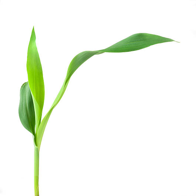

Healthy corn


In [25]:
dest = 'example1.jpg'
img = PILImage.create(dest)
what_is_it, _, probs = learn.predict(img)
print("Image you provided :-")

# Resize the image to 196x196 pixels and then display
resized_img = img.resize((196, 196))
display(resized_img)

print(what_is_it)